# ATTRITION ANALYSIS

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('C:\\DATA ANALYST\\POWER BI\\VS PBI Projects\\Attrition\\hrattrition.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(1257, 38)

In [4]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## KPI PERFORMANCE

In [5]:
Total_Employees = df['EmpID'].count()
print(f"Total Employees: {Total_Employees}")

Total Employees: 1257


In [6]:
Total_Attrition = df[df['Attrition']== 'Yes']['Attrition'].count()
print(f"Total Attrition: {Total_Attrition}")

Total Attrition: 215


In [7]:
Attrition_Rate = (Total_Attrition/Total_Employees)*100
print(f"Attrition Rate:", round(Attrition_Rate,2),"%")

Attrition Rate: 17.1 %


In [8]:
Average_Salary = df['MonthlyIncome'].mean()
print(f"Average Salary:", int(Average_Salary),"rupees")

Average Salary: 5737 rupees


In [9]:
Average_YearsatCompany = df['YearsAtCompany'].mean()
print(f"Average Years at Company:",  round(Average_YearsatCompany,1)," years" )

Average Years at Company: 5.2  years


## EXPLORATORY DATA ANALYSIS

In [10]:
df_ay= df[df['Attrition'] == 'Yes']

### Attrition Vs Gender

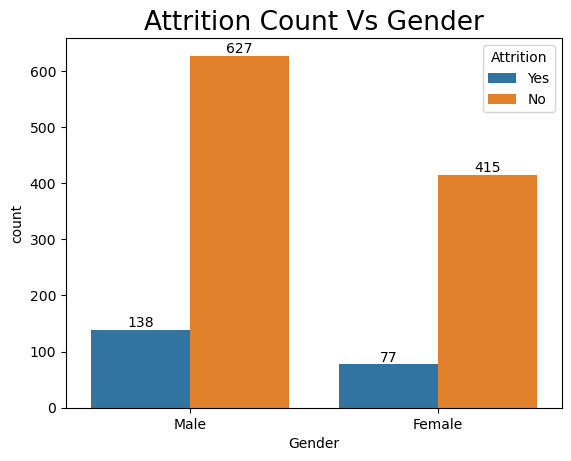

In [11]:
a = sns.countplot( data = df, x='Gender', hue = 'Attrition')
for bars in a.containers:
    a.bar_label(bars)

plt.title('Attrition Count Vs Gender',fontsize =19)
plt.xlabel('Gender')
plt.ylabel('count')
plt.legend(title='Attrition')

plt.show()

### Attrition by Department

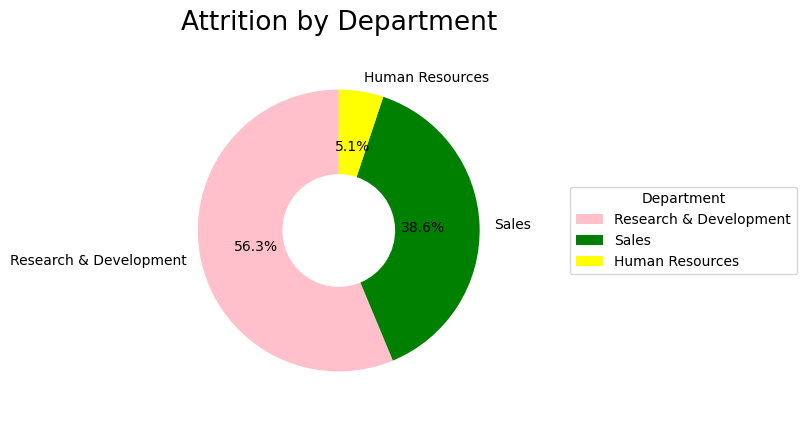

In [12]:
Department_counts = df_ay['Department'].value_counts()

color_select = {
    'Human Resources' : 'yellow',
    'Research & Development' : 'pink',
    'Sales' : 'green'
}
colors1 = [color_select[Department] for Department in Department_counts.index]

plt.figure(figsize=(4, 5))
plt.pie(
    Department_counts, 
   labels=Department_counts.index, 
    autopct='%2.1f%%', 
    startangle=90,
    colors = colors1,
    wedgeprops={'width': 0.6}  # This makes it a donut
)

plt.title('Attrition by Department',fontsize =19 )
plt.legend(Department_counts.index,title="Department", loc="center right" , bbox_to_anchor =(1.5,0,0.5,1))
plt.axis('equal')
plt.show()

### Attrition by Education Field

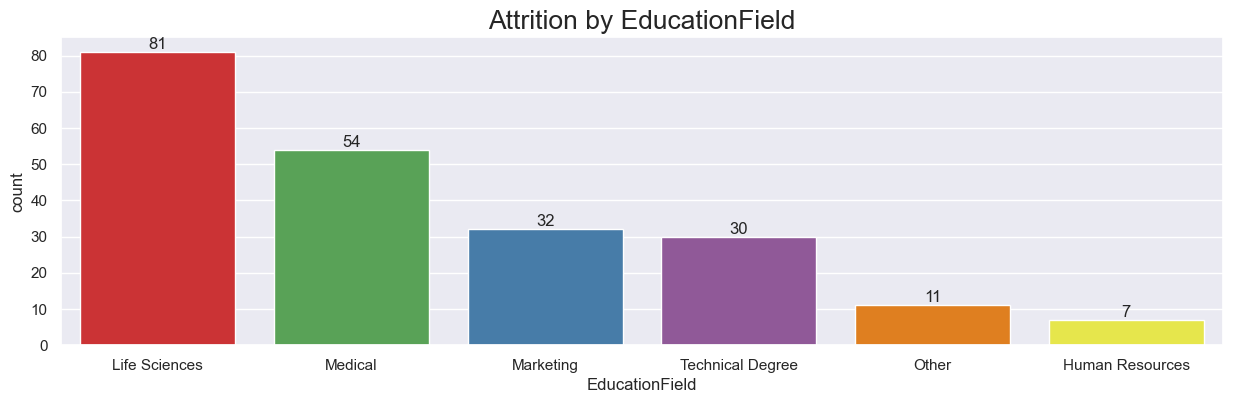

In [13]:
educationfield = df_ay['EducationField'].value_counts().sort_values(ascending= False)
sortorder= educationfield.index

sns.set(rc={'figure.figsize':(15,4)})
a = sns.countplot( data = df_ay, x='EducationField', hue = 'EducationField',order = sortorder, palette = 'Set1')
for bars in a.containers:
    a.bar_label(bars)

plt.title('Attrition by EducationField',fontsize =19)
plt.xlabel('EducationField')
plt.ylabel('count')
plt.show()

### Attrition by Age Group

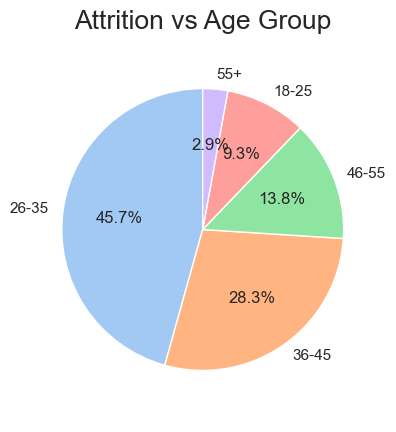

In [14]:
AgeGroup_counts = df['AgeGroup'].value_counts()

plt.figure(figsize=(4, 5))
plt.pie(AgeGroup_counts, labels=AgeGroup_counts.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("pastel"))
plt.title('Attrition vs Age Group' , fontsize = 19)
plt.axis('equal')
plt.show()

### Attrition by Job Role

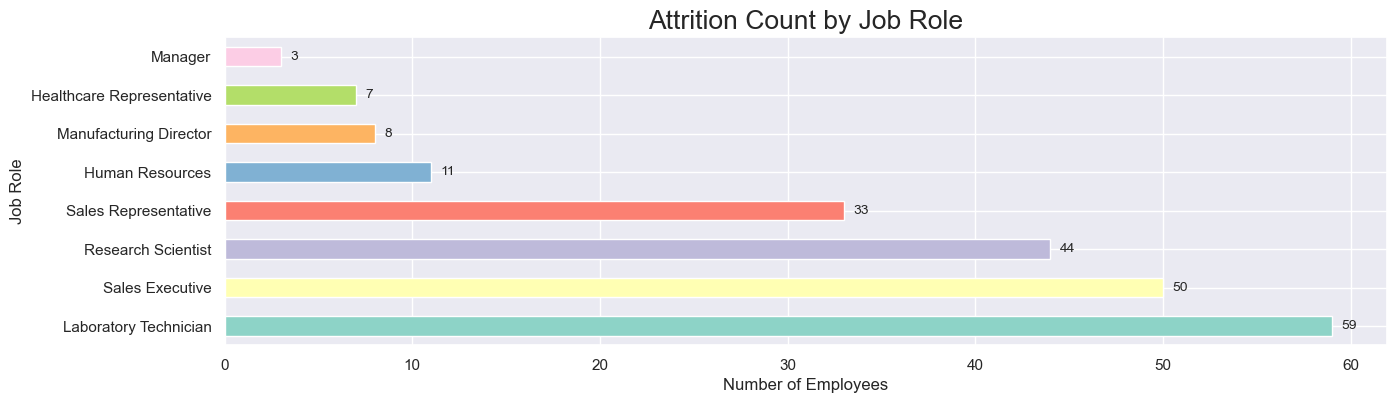

In [15]:
jobrolecount = df_ay['JobRole'].value_counts()
colors2 = plt.cm.Set3(range(len(jobrolecount)))

for index, value in enumerate(jobrolecount):
    plt.text(value + 0.5, index, str(value), va = 'center', fontsize=10)

df_ay['JobRole'].value_counts().plot(kind='barh',color=colors2)
plt.title('Attrition Count by Job Role',fontsize =19)
plt.xlabel('Number of Employees')
plt.ylabel('Job Role')
plt.show()

### Years@Company Vs Attrition

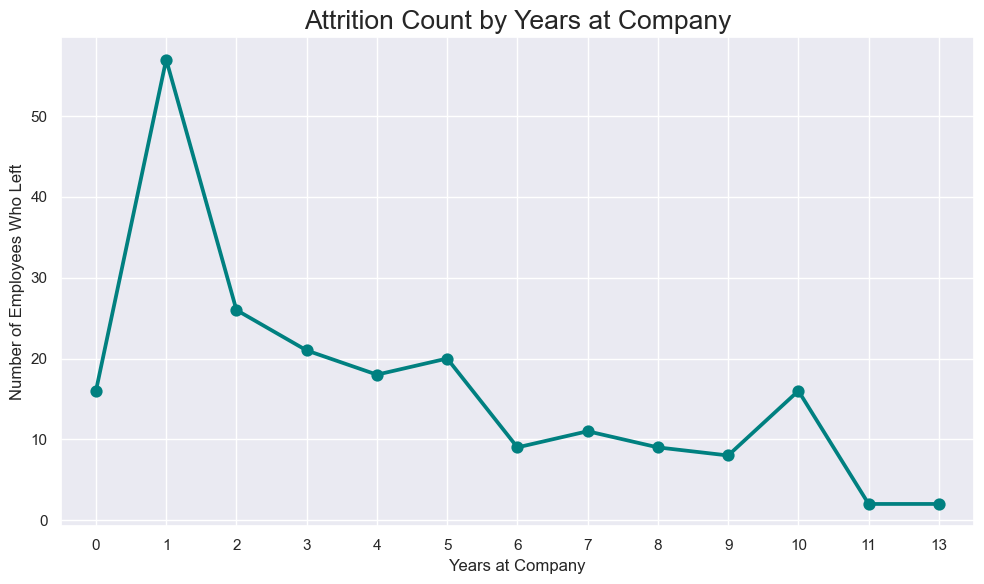

In [16]:
counts = df_ay['YearsAtCompany'].value_counts().sort_index()
df_plot = counts.reset_index()
df_plot.columns = ['YearsAtCompany', 'AttritionCount']


plt.figure(figsize=(10, 6))
sns.pointplot(data=df_plot, x='YearsAtCompany', y='AttritionCount', color='teal', marker='o')

plt.title('Attrition Count by Years at Company',fontsize =19)
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees Who Left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Attrition by Salary Slab and Monthly Income

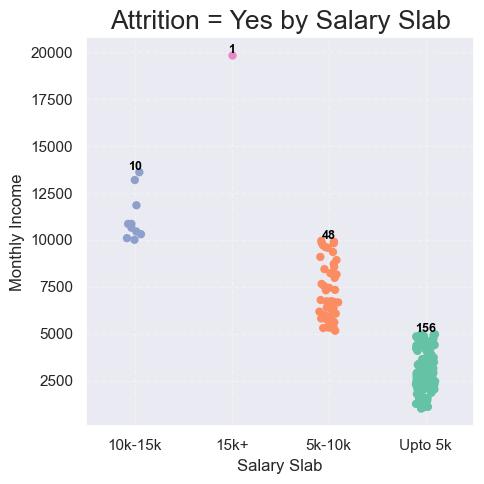

In [17]:
df_ay = df[df['Attrition'] == 'Yes']

# Count attrition per SalarySlab
slab_counts = df_ay['SalarySlab'].value_counts().reset_index()
slab_counts.columns = ['SalarySlab', 'AttritionCount']

# Sort SalarySlab order to match x-axis
slab_order = sorted(df_ay['SalarySlab'].unique())

# Create swarm plot
plt.figure(figsize=(5,5))
ax = sns.stripplot(data=df_ay, x='SalarySlab', y='MonthlyIncome',hue = 'SalarySlab', palette='Set2', size=6,legend = False, order=slab_order)

# Add count labels above each salary slab
for i, slab in enumerate(slab_order):
    count = slab_counts.loc[slab_counts['SalarySlab'] == slab, 'AttritionCount'].values
    if len(count) > 0:
        plt.text(
            x=i, y=df_ay[df_ay['SalarySlab'] == slab]['MonthlyIncome'].max() + 100, # place label above max dot
            s=f"{count[0]}",
            ha='center',fontsize=9, fontweight='bold', color='black' )

plt.title("Attrition = Yes by Salary Slab",fontsize =19)
plt.xlabel("Salary Slab")
plt.ylabel("Monthly Income")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Attrition: JobSatisfaction vs EnvironmentSatisfaction

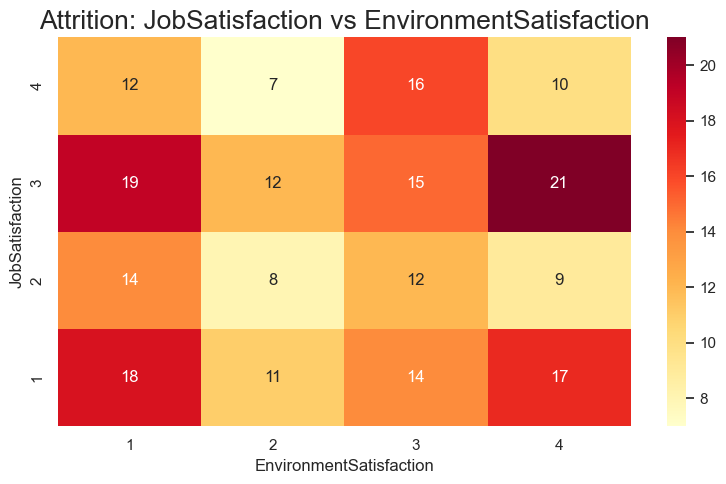

In [18]:
pivot = df_ay.pivot_table(index='JobSatisfaction', columns='EnvironmentSatisfaction', aggfunc='size', fill_value=0).sort_index(ascending=False)

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Attrition: JobSatisfaction vs EnvironmentSatisfaction',fontsize =19)
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('JobSatisfaction')
plt.tight_layout()
plt.show()